Problem Statement:

Extract reviews of any product from ecommerce website like amazon
Perform emotion mining

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
# IMDB Movie reviews

In [34]:
# Extracting the movie reviews from IMDB website

url = "http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
resp = requests.get(url)
print(resp.status_code)
#print(resp.content)
soup = BeautifulSoup(resp.text,"html.parser")
#soup.prettify()


200


In [35]:
reviews = soup.findAll("div", attrs={"class","text"})
print(type(reviews))
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

<class 'bs4.element.ResultSet'>


In [37]:
# Creating a data frame 
import pandas as pd
movie_reviews = pd.DataFrame(reviews, columns = ["reviews"])
movie_reviews

,reviews
0,"Like most adults, I came to view this film as ..."
1,As an individual double majoring in Computer S...
2,Moana is a return to the classic Disney formul...
3,I love everything about this movie. The colors...
4,"Why this movie has 7.6? Y'all crazy, this is a..."
5,"Wow, what a great great movie! The visuals in ..."
6,Instant classic.Easily ranks among the best fr...
7,"From the opening lyrics to the final shot, Moa..."
8,"Hi there,I'm not gonna say much other than tha..."
9,2016 has been a particularly strong year for a...


In [38]:
movie_reviews.shape

(25, 1)

In [45]:
import string 
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
movie_reviews = [reviews.strip() for reviews in movie_reviews.reviews]

In [4]:
#Preprocessing the text

In [41]:
movie_reviews = [reviews for reviews in movie_reviews if reviews]           # removing the empty strings from the data
movie_reviews[0:25]

["Like most adults, I came to view this film as a result of having two small children. However, I was very pleasantly surprised by the film, and my kids loved it.Let me start by saying that the original music for the film was outstanding. When watching Disney, you expect it to be good, but the soundtrack is amazing. The animation in the film was also what you'd expect from Disney...superb.Now as far as the plot goes. You have a heroine, and what I feel is the first real heroine in all of the animated films that I've watched. Most films make a forced effort to show girls that they can also excel and be whoever they choose. Moana takes a girl, who's also a princess by the way but an ordinary one, and allows her to truly explore, achieve, and save the world not through magic, extraordinary power or luck, but through hard work and perseverance. She is real. Maui is also the perfect comic relief and the Rock does an excellent job in this roll.My kids want to watch it again and so do I.",
 '

In [42]:
# joining the list of comments into a single text/string

text = ' '.join(movie_reviews)

In [43]:
len(text)

36639

## Removing punctuations 

In [46]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Like most adults I came to view this film as a result of having two small children However I was very pleasantly surprised by the film and my kids loved itLet me start by saying that the original music for the film was outstanding When watching Disney you expect it to be good but the soundtrack is amazing The animation in the film was also what youd expect from DisneysuperbNow as far as the plot goes You have a heroine and what I feel is the first real heroine in all of the animated films that Ive watched Most films make a forced effort to show girls that they can also excel and be whoever they choose Moana takes a girl whos also a princess by the way but an ordinary one and allows her to truly explore achieve and save the world not through magic extraordinary power or luck but through hard work and perseverance She is real Maui is also the perfect comic relief and the Rock does an excellent job in this rollMy kids want to watch it again and so do I As an individual double majoring in

## Tokenization

In [48]:
import nltk
from nltk.tokenize import word_tokenize

In [49]:
tokens = word_tokenize(no_punc_text)
tokens[0:25]

['Like',
 'most',
 'adults',
 'I',
 'came',
 'to',
 'view',
 'this',
 'film',
 'as',
 'a',
 'result',
 'of',
 'having',
 'two',
 'small',
 'children',
 'However',
 'I',
 'was',
 'very',
 'pleasantly',
 'surprised',
 'by',
 'the']

In [50]:
len(tokens)

6450

## Removing Stopwords

In [51]:
from nltk.corpus import stopwords
nltk.download('punkt')      
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
text_stopwords = stopwords.words("english")
text_stopwords.append('an')
no_stop_words = [word for word in tokens if not word in text_stopwords]
no_stop_words[:25]

['Like',
 'adults',
 'I',
 'came',
 'view',
 'film',
 'result',
 'two',
 'small',
 'children',
 'However',
 'I',
 'pleasantly',
 'surprised',
 'film',
 'kids',
 'loved',
 'itLet',
 'start',
 'saying',
 'original',
 'music',
 'film',
 'outstanding',
 'When']

## Normalizing the text(converting all the text to lower case)

In [53]:
lower_words = [text.lower() for text in no_stop_words]
lower_words[0:25]

['like',
 'adults',
 'i',
 'came',
 'view',
 'film',
 'result',
 'two',
 'small',
 'children',
 'however',
 'i',
 'pleasantly',
 'surprised',
 'film',
 'kids',
 'loved',
 'itlet',
 'start',
 'saying',
 'original',
 'music',
 'film',
 'outstanding',
 'when']

## Stemming 

In [54]:
from nltk.stem import PorterStemmer

In [55]:
ps = PorterStemmer()

In [57]:
stem_words = [ps.stem(word) for word in lower_words]
stem_words[0:25]

['like',
 'adult',
 'i',
 'came',
 'view',
 'film',
 'result',
 'two',
 'small',
 'children',
 'howev',
 'i',
 'pleasantli',
 'surpris',
 'film',
 'kid',
 'love',
 'itlet',
 'start',
 'say',
 'origin',
 'music',
 'film',
 'outstand',
 'when']

## Lemmatization

In [58]:
nlp = spacy.load("en_core_web_sm")

In [59]:
# joining the stopwords into a paragraph

doc = nlp(' '.join(no_stop_words))
doc[0:25]

Like adults I came view film result two small children However I pleasantly surprised film kids loved itLet start saying original music film outstanding When

In [60]:
lemmas = [token.lemma_ for token in doc]
lemmas[:25]

['like',
 'adult',
 'I',
 'come',
 'view',
 'film',
 'result',
 'two',
 'small',
 'child',
 'however',
 'I',
 'pleasantly',
 'surprise',
 'film',
 'kid',
 'love',
 'itlet',
 'start',
 'say',
 'original',
 'music',
 'film',
 'outstanding',
 'when']

## POS tagging

In [69]:
one_block = movie_reviews[15]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [70]:
# getting the tokens and pos tags for the tokens

for tokens in doc_block[0:25]:
    print(tokens,tokens.pos_)

Despite SCONJ
being VERB
a DET
lifelong ADJ
Disney PROPN
fan NOUN
, PUNCT
that DET
is AUX
not PART
to PART
say VERB
that SCONJ
everything PRON
they PRON
've AUX
done VERB
is AUX
great ADJ
. PUNCT
They PRON
've AUX
done VERB
many ADJ
classics NOUN


In [71]:
# extracting the nouns and verbs
noun_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(noun_verbs[0:25])

['being', 'fan', 'say', 'done', 'done', 'classics', 'revolutionary', 'hit', 'miss', 'periods', '80s', "'Enchanted", 'saw', 'return', 'form', 'likes', 'Tangled', 'Wreck', 'were', 'was', 'lot', 'period', 'years', 'momentum', 'dips']


In [ ]:
# getting the word count

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:15]

,words,count
0,being,5
1,film,5
2,story,4
3,way,4
4,was,3
5,character,3
6,things,3
7,looking,3
8,year,3
9,voice,3


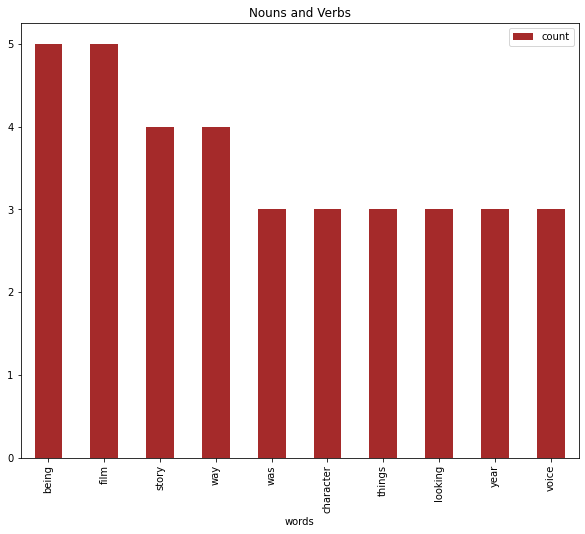

In [75]:
wf_df[0:10].plot.bar(x = 'words', title = 'Nouns and Verbs', figsize = (10,8),color = 'brown');

# Sentiment Analysis

In [76]:
afinn = pd.read_csv("G:/data sceince/Python/Emotion mining/Afinn.csv")

In [77]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [78]:
afinn.shape

(2477, 2)

In [79]:
from itertools import islice

def take(n,iterable):
    return list(islice(iterable, n))

In [80]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [82]:
take(15,affinity_scores)

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors',
 'abilities',
 'ability',
 'aboard',
 'absentee',
 'absentees']

In [83]:
from nltk import tokenize

In [84]:
sentence = tokenize.sent_tokenize(' '.join(movie_reviews))
sentence[5:15]

['Most films make a forced effort to show girls that they can also excel and be whoever they choose.',
 "Moana takes a girl, who's also a princess by the way but an ordinary one, and allows her to truly explore, achieve, and save the world not through magic, extraordinary power or luck, but through hard work and perseverance.",
 'She is real.',
 'Maui is also the perfect comic relief and the Rock does an excellent job in this roll.My kids want to watch it again and so do I.',
 'As an individual double majoring in Computer Science and Creative Writing (with a focus on screenplays) I have to say that Moana was one of the best Disney Movies that I have ever watched!',
 'In fact, I was astonished by its storyline along with its animations that it became one of my favorite movies and ended up buying my own Moana doll for Christmas!SPOILERS: In particular, I truly enjoyed the scenes where Moana gained the confidence to go out there and voyage into the sea even though her dad Tui wanted her t

In [85]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,"Like most adults, I came to view this film as ..."
1,"However, I was very pleasantly surprised by th..."
2,"When watching Disney, you expect it to be good..."
3,The animation in the film was also what you'd ...
4,"You have a heroine, and what I feel is the fir..."
...,...
301,The entire score evokes a sense of adventure a...
302,I am a really big fan of Disney princess movie...
303,"I love the characters, the animation, and the ..."
304,"If you are a fellow Disney princess fan, and h..."


In [86]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [87]:
def calculate_sentiment(text: str = None)->float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [88]:
calculate_sentiment("never poor")

-2

In [90]:
# Getting the word count from sentences

sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(25)

0     17
1     27
2     14
3     18
4     22
5     19
6     39
7      3
8     27
9     34
10    67
11    46
12     9
13    11
14    27
15    24
16    22
17    12
18    15
19    21
20    45
21    18
22    48
23     9
24    47
Name: word_count, dtype: int64

In [92]:
sent_df['sentiment_scores'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df

,sentences,word_count,sentiment_scores
0,"Like most adults, I came to view this film as ...",17,2
1,"However, I was very pleasantly surprised by th...",27,8
2,"When watching Disney, you expect it to be good...",14,7
3,The animation in the film was also what you'd ...,18,5
4,"You have a heroine, and what I feel is the fir...",22,0
...,...,...,...
301,The entire score evokes a sense of adventure a...,88,4
302,I am a really big fan of Disney princess movie...,23,7
303,"I love the characters, the animation, and the ...",9,3
304,"If you are a fellow Disney princess fan, and h...",20,3


In [93]:
sent_df.sort_values(by = 'sentiment_scores').tail(20)

,sentences,word_count,sentiment_scores
151,She is voiced by Auli'I Cravaljo and it fits l...,16,9
299,This film is an epic in the truest sense and e...,85,9
68,It won't be easy; life wasn't meant to be easy...,24,9
139,It won't be easy; life wasn't meant to be easy...,24,9
159,"Moana has a great beginning, good middle, and ...",11,9
193,"The story is, while not exactly original, beau...",61,10
194,The coconut pirates scene may seem like filler...,79,10
172,"Moana (Auli'i Cravalho), the princess of one s...",82,10
117,"This is yet the best disney movie ever made, t...",40,10
33,"Wow, what a great great movie!",6,10


In [96]:
sent_df['sentiment_scores'].describe()

count    306.00000
mean       1.96732
std        3.84438
min       -9.00000
25%        0.00000
50%        1.00000
75%        4.00000
max       16.00000
Name: sentiment_scores, dtype: float64

In [97]:
sent_df[sent_df['sentiment_scores']>=15]

,sentences,word_count,sentiment_scores
69,"It has a superb single, a nice accompanying so...",24,16
140,"It has a superb single, a nice accompanying so...",24,16


In [98]:
sent_df[sent_df['sentiment_scores']<0]

,sentences,word_count,sentiment_scores
17,"""All and all, I can't think of anything wrong ...",12,-2
62,Just don't follow hard tradition all the time.,8,-1
70,"I admit, I was expecting too much from Moana a...",21,-1
79,It's no fluke that out of the four movies I ju...,38,-3
81,"Now, the world is slowly dying and someone mus...",19,-3
108,Conflict happens and princess and wacky sideki...,9,-2
133,Just don't follow hard tradition all the time.,8,-1
141,"I admit, I was expecting too much from Moana a...",21,-1
163,It would appear that Disney's new approach to ...,40,-3
164,As aforementioned in the introduction Moana is...,19,-2


In [99]:
# Visualizing the sentiment scores

In [100]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='sentiment_scores', ylabel='Density'>

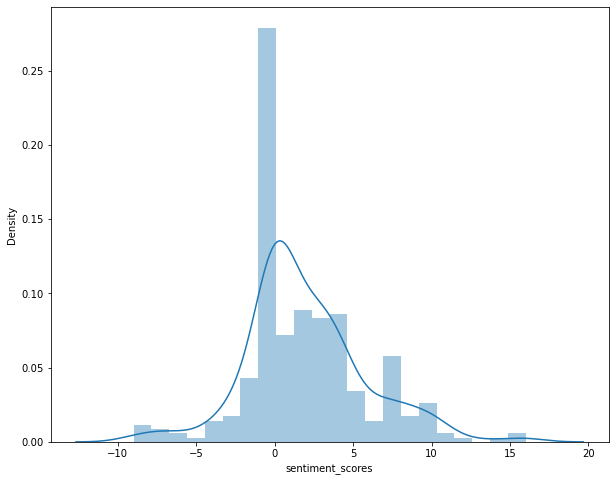

In [101]:
plt.figure(figsize = (10,8))
sns.distplot(sent_df['sentiment_scores'])

<AxesSubplot:ylabel='sentiment_scores'>

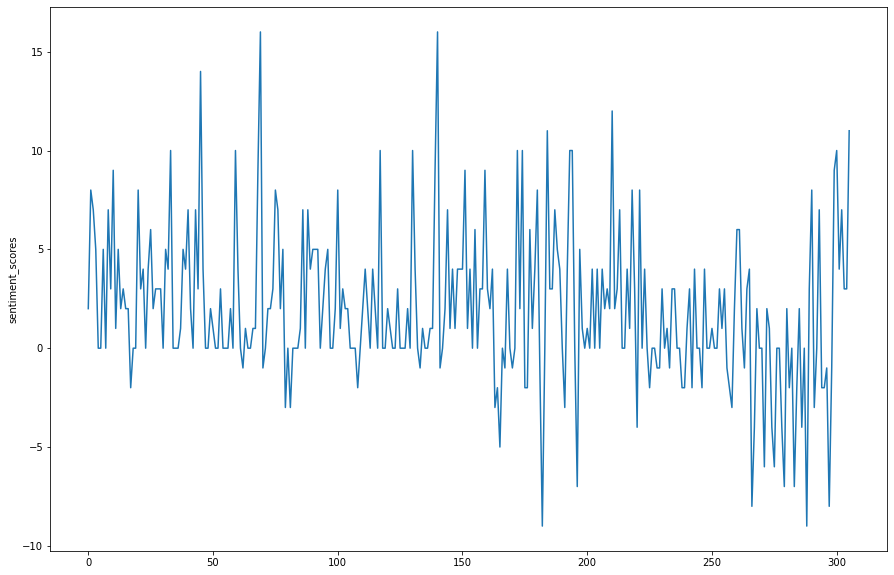

In [102]:
plt.figure(figsize=(15,10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_scores'], data = sent_df)

Inference : The maximum score we are having is 16 and minimum is -9

In [109]:
string = " ".join(sent_df["sentences"])

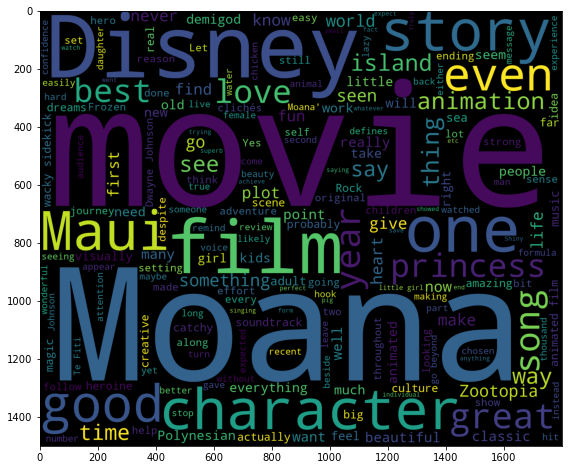

In [112]:
from wordcloud import WordCloud
plt.figure(figsize = (15,8))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud_stw)